In [2]:
import numpy as np
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
# kagglehub.login()


In [3]:
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rjmanoj/credit-card-customer-churn-prediction",
"Churn_Modelling.csv"
)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17872\956478153.py:1: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()  # Display information about the DataFrame, including column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)  # Drop unnecessary columns

In [7]:
df['Exited'].value_counts()  # Count the number of customers who exited and those who did not

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype=int)  # Convert categorical variables to dummy variables    

In [9]:
df.head()  # Display the first few rows of the DataFrame

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
df['Geography_Germany']=df['Geography_Germany'].astype(int) # Convert 'Geography_Germany' to integer type

In [11]:
from sklearn.model_selection import train_test_split
X= df.drop('Exited', axis=1)  # Features
Y= df['Exited']  # Target variable
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [12]:
Y_train.head()  # Display the first few rows of the target variable for training data

9254    0
1561    0
1670    1
6087    1
6669    1
Name: Exited, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scale = scaler.transform(X_test)  # Transform the test data using the same scaler


In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential()  # Initialize a sequential model
model.add(Dense(11, activation='relu', input_dim= 11))
model.add(Dense(8, activation='relu'))  # Hidden layer with 8 neurons and ReLU activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

In [19]:
model.summary()  # Display the model summary

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237 (948.00 B)

 Trainable params: 237 (948.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer and binary crossentropy loss

In [21]:
his = model.fit(X_train_scale, Y_train, epochs=50, validation_split=0.2)  # Train the model

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5043 - loss: 0.7078 - val_accuracy: 0.7912 - val_loss: 0.5137
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7888 - loss: 0.4970 - val_accuracy: 0.8081 - val_loss: 0.4410
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8017 - loss: 0.4424 - val_accuracy: 0.8188 - val_loss: 0.4182
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8033 - loss: 0.4291 - val_accuracy: 0.8288 - val_loss: 0.4066
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8084 - loss: 0.4269 - val_accuracy: 0.8319 - val_loss: 0.3975
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8217 - loss: 0.3961 - val_accuracy: 0.8363 - val_loss: 0.3859
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8410 - loss: 0.3841 - val_accuracy: 0.8419 - val_loss: 0.3750
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8492 - loss: 0.3727 - val_accuracy: 0.

In [22]:
model.layers[1].get_weights()  # Get the weights of the first layer

[array([[ 0.14848341, -0.46138254,  0.47598335, -0.21302691,  0.19866416,
         -0.09655462,  0.13750671, -0.3614176 ],
        [-0.516682  ,  0.2442756 , -0.57824874, -0.7619394 , -0.55777943,
          0.46160513,  0.65979034,  0.26899105],
        [ 0.28416002, -0.00711436,  0.44563597, -0.45010903,  0.44212708,
          0.57615477, -0.16948354, -0.30088717],
        [ 0.43619257,  0.12263898, -0.0793734 ,  0.18612935, -0.40960318,
          0.453127  , -0.51381654, -0.19728008],
        [ 0.26655617,  0.35496786, -0.26423925,  0.3350238 ,  0.26090524,
         -0.00466922, -0.3031451 , -0.43863913],
        [-0.6761052 ,  0.60661876, -0.43532488, -0.5125625 , -0.6605531 ,
          0.25184962, -0.2659187 , -0.06807   ],
        [ 0.6542255 , -0.4602815 ,  0.27987394,  0.5448469 , -0.44519684,
          0.35235065,  0.26122862, -0.13640939],
        [ 0.19447635, -1.1235667 ,  0.22176997,  0.44542742,  0.5384717 ,
         -0.5260189 ,  0.3522634 , -0.31460568],
        [-0.0558

In [23]:
y_pre = (model.predict(X_test_scale) > 0.5).astype(int)  # Make predictions on the test data as 0 or 1

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pre)  # Calculate the accuracy of the model

0.8635

Text(0.5, 1.0, 'Model Accuracy')

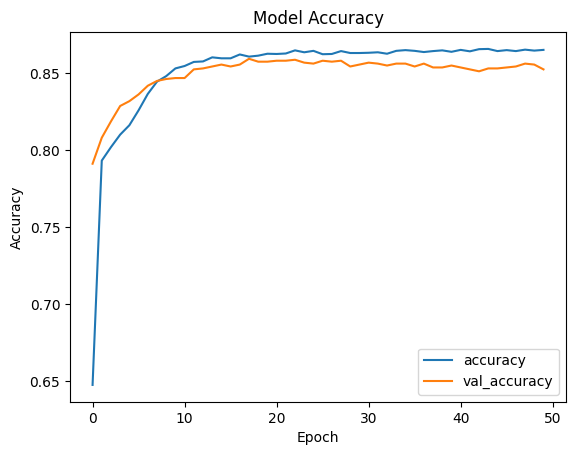

In [25]:
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'], label='accuracy')  # Plot training accuracy
plt.plot(his.history['val_accuracy'], label='val_accuracy')  # Plot validation accuracy
plt.xlabel('Epoch')  # Set x-axis label
plt.ylabel('Accuracy')  # Set y-axis label
plt.legend(loc='lower right')  # Add legend
plt.title('Model Accuracy')  # Set title for the plot

Text(0.5, 1.0, 'Model Loss')

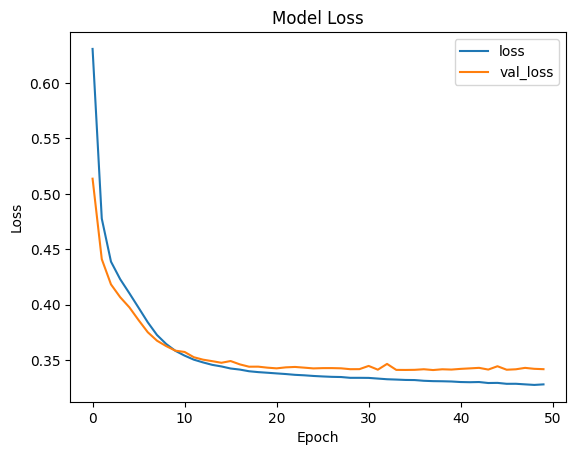

In [26]:
plt.plot(his.history['loss'], label='loss')  # Plot training loss
plt.plot(his.history['val_loss'], label='val_loss')  # Plot validation loss
plt.xlabel('Epoch')  # Set x-axis label
plt.ylabel('Loss')  # Set y-axis label
plt.legend(loc='upper right')  # Add legend
plt.title('Model Loss')  # Set title for the plot